In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_diesel.csv')

In [3]:
df.head()

,MGO LOCAL (GHp/Lt),KEROSENE (GHp/Lt),LPG (GHp/Kg),PETROL (GHp/Lt),DIESEL (GHp/Lt)
0,768.23,639.13,838.98,780.0,682.0
1,888.73,750.00,937.65,798.0,796.0
2,903.04,830.00,972.98,940.0,938.0
3,1063.78,1108.13,1157.98,1120.0,1255.0
4,1037.96,1199.30,1087.96,1180.0,1236.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MGO LOCAL (GHp/Lt)  19 non-null     float64
 1   KEROSENE (GHp/Lt)   19 non-null     float64
 2   LPG (GHp/Kg)        19 non-null     float64
 3   PETROL (GHp/Lt)     19 non-null     float64
 4   DIESEL (GHp/Lt)     19 non-null     float64
dtypes: float64(5)
memory usage: 888.0 bytes


In [5]:
df.columns

Index(['MGO LOCAL (GHp/Lt)', 'KEROSENE (GHp/Lt)', 'LPG (GHp/Kg)',
       'PETROL (GHp/Lt)', 'DIESEL (GHp/Lt)'],
      dtype='object')

In [6]:
df.isnull().sum()

MGO LOCAL (GHp/Lt)    0
KEROSENE (GHp/Lt)     0
LPG (GHp/Kg)          0
PETROL (GHp/Lt)       0
DIESEL (GHp/Lt)       0
dtype: int64

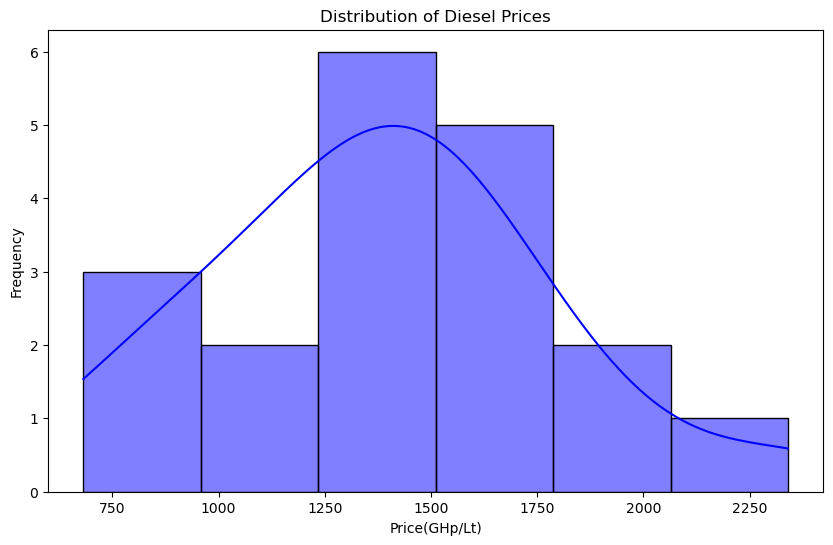

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['DIESEL (GHp/Lt)'], kde=True, color='blue')
plt.title('Distribution of Diesel Prices')
plt.xlabel('Price(GHp/Lt)')
plt.ylabel('Frequency')
plt.show()

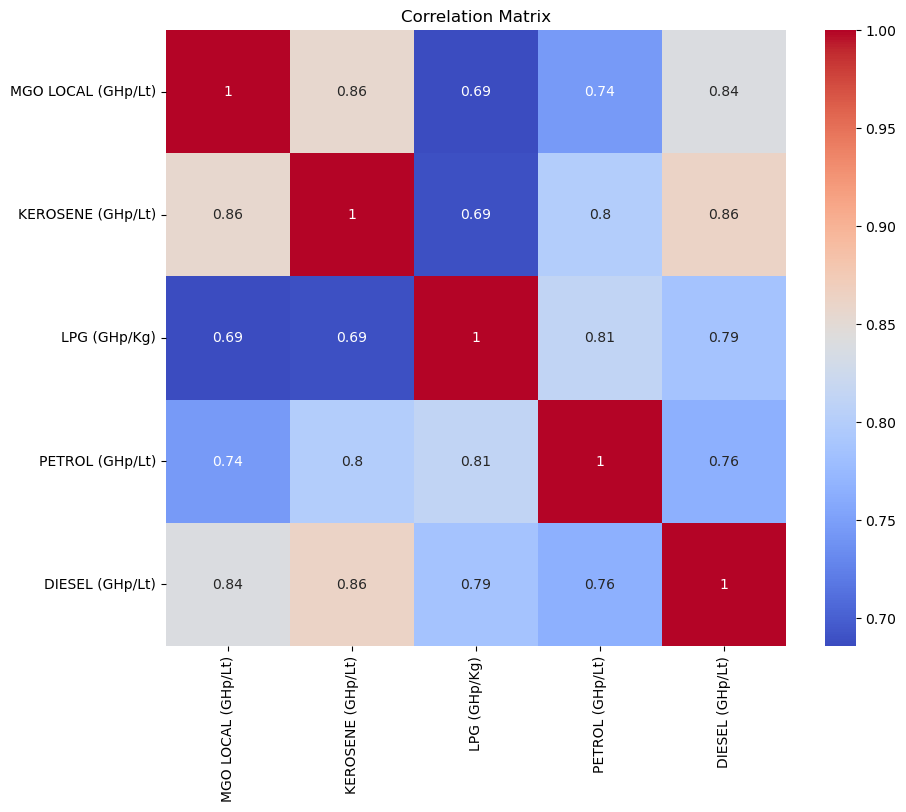

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
corr_matrix = df.corr()

# Identify the most relevant features for predicting 'Diesel Prices'
relevant_features = corr_matrix['DIESEL (GHp/Lt)'].sort_values(ascending=False)
print(relevant_features)

DIESEL (GHp/Lt)       1.000000
KEROSENE (GHp/Lt)     0.862243
MGO LOCAL (GHp/Lt)    0.839264
LPG (GHp/Kg)          0.786049
PETROL (GHp/Lt)       0.764944
Name: DIESEL (GHp/Lt), dtype: float64


In [10]:
X = df.drop('DIESEL (GHp/Lt)', axis=1)
y = df['DIESEL (GHp/Lt)']

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 34070.83641679996
R-squared: -0.0755742354224993


In [12]:
rf_model

RandomForestRegressor(random_state=42)

In [13]:
import joblib

In [14]:
joblib.dump(rf_model, 'random_forest_regressor_model_for_diesel.joblib')

['random_forest_regressor_model_for_diesel.joblib']

In [15]:
predictions = rf_model.predict(X_test)

In [16]:
#predicted diesel price
predictions

array([ 898.3484, 1184.0252])

In [17]:
#original diesel price
y_test

0     682.00
5    1037.96
Name: DIESEL (GHp/Lt), dtype: float64

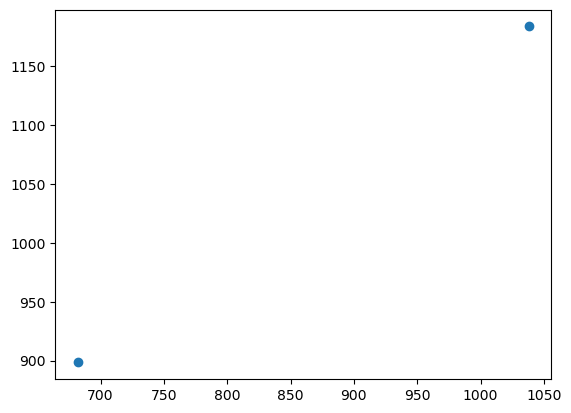

In [18]:
plt.scatter(y_test,predictions)